In [567]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [568]:
start_date = datetime.date(2020, 1, 21)
end_date = datetime.date(2020, 2, 8)

In [569]:
nCov_confirmed_data = pd.read_csv(r'C:\Users\David Lau\Desktop\nCov_data_confirmed_20200208.csv')
nCov_death_data = pd.read_csv(r'C:\Users\David Lau\Desktop\nCov_data_death_20200208.csv')

In [570]:
remove_column = ["1/24/2020 12:00 AM",
"1/25/2020 12:00 AM",
"1/25/2020 12:00 PM",
"1/26/2020 11:00 AM",
"1/27/2020 9:00 AM",
"1/27/2020 7:00 PM",
"1/28/2020 1:00 PM",
"1/28/2020 6:00 PM",
"1/29/2020 1:30 PM",
"1/29/2020 2:30 PM",
"1/31/2020 2:00 PM",
"2/4/2020 9:40",
"2/5/2020 9:00",
"2/6/2020 9:00",
"2/7/2020 20:13",
"2/8/2020 22:04"]

def RemoveDate (original_file):
    revised_file = original_file
    for n in remove_column:
        revised_file = revised_file.drop(n, axis=1)
    return revised_file

In [571]:
revised_nCov_confirmed_data = RemoveDate(nCov_confirmed_data)
revised_nCov_death_data = RemoveDate(nCov_death_data)

In [572]:
def RenameDate(original_file):
    original_file.rename(
        columns={
            "1/21/2020 10:00 PM": datetime.date(2020, 1, 21),
            "1/22/2020 12:00 PM": datetime.date(2020, 1, 22),
            "1/23/2020 12:00 PM": datetime.date(2020, 1, 23),
            "1/24/2020 12:00 PM": datetime.date(2020, 1, 24),
            "1/25/2020 10:00 PM": datetime.date(2020, 1, 25),
            "1/26/2020 11:00 PM": datetime.date(2020, 1, 26),
            "1/27/2020 8:30 PM": datetime.date(2020, 1, 27),
            "1/28/2020 11:00 PM": datetime.date(2020, 1, 28),
            "1/29/2020 9:00 PM": datetime.date(2020, 1, 29),
            "1/30/2020 11:00 AM": datetime.date(2020, 1, 30),
            "1/31/2020 7:00 PM": datetime.date(2020, 1, 31),
            "2/1/2020 10:00": datetime.date(2020, 2, 1),
            "2/2/2020 21:00": datetime.date(2020, 2, 2),
            "2/3/2020 21:00": datetime.date(2020, 2, 3),
            "2/4/2020 22:00": datetime.date(2020, 2, 4),
            "2/5/2020 23:00": datetime.date(2020, 2, 5),
            "2/6/2020 14:20": datetime.date(2020, 2, 6),
            "2/7/2020 22:50": datetime.date(2020, 2, 7),
            "2/8/2020 23:04": datetime.date(2020,2,8)
        },
        inplace=True
    )
    return original_file

In [573]:
revised_nCov_confirmed_data = RenameDate(revised_nCov_confirmed_data)
revised_nCov_death_data = RenameDate(revised_nCov_death_data)

In [574]:
revised_nCov_confirmed_data.at[38,"Country/Region"] = "Mainland China"
revised_nCov_death_data.at[38,"Country/Region"] = "Mainland China"

In [575]:
death_rate = revised_nCov_confirmed_data.copy()
death_rate.loc[:,start_date:end_date] = revised_nCov_death_data.loc[:,start_date:end_date].div(revised_nCov_confirmed_data.loc[:,start_date:end_date])

In [576]:
revised_nCov_confirmed_data_China = revised_nCov_confirmed_data[revised_nCov_confirmed_data["Country/Region"] == "Mainland China"]
revised_nCov_death_data_China = revised_nCov_death_data[revised_nCov_death_data["Country/Region"] == "Mainland China"]
revised_nCov_confirmed_data_ExChina = revised_nCov_confirmed_data[revised_nCov_confirmed_data["Country/Region"] != "Mainland China"]
revised_nCov_death_data_ExChina = revised_nCov_death_data[revised_nCov_death_data["Country/Region"] != "Mainland China"]

In [577]:
revised_nCov_confirmed_data_ChinaExHubei = revised_nCov_confirmed_data_China[revised_nCov_confirmed_data_China["Province/State"] != "Hubei"]
revised_nCov_death_data_ChinaExHubei = revised_nCov_death_data_China[revised_nCov_death_data_China["Province/State"] != "Hubei"]
revised_nCov_confirmed_data_Hubei = revised_nCov_confirmed_data_China[revised_nCov_confirmed_data_China["Province/State"] == "Hubei"]
revised_nCov_death_data_Hubei = revised_nCov_death_data_China[revised_nCov_death_data_China["Province/State"] == "Hubei"]

In [578]:
total_confirmed = revised_nCov_confirmed_data.sum(axis=0,)
total_death = revised_nCov_death_data.sum(axis=0)
total_death_rate = total_death / total_confirmed

total_confirmed_China = revised_nCov_confirmed_data_China.sum(axis=0)
total_death_China = revised_nCov_death_data_China.sum(axis=0)
total_confirmed_China = total_confirmed_China.drop(['Province/State'])
total_confirmed_China = total_confirmed_China.drop(['Country/Region'])
total_death_rate_China = total_death_China / total_confirmed_China

total_confirmed_ExChina = revised_nCov_confirmed_data_ExChina.sum(axis=0)
total_death_ExChina = revised_nCov_death_data_ExChina.sum(axis=0)
total_death_rate_ExChina = total_death_ExChina / total_confirmed_ExChina

total_confirmed_ChinaExHubei = revised_nCov_confirmed_data_ChinaExHubei.sum(axis=0)
total_death_ChinaExHubei = revised_nCov_death_data_ChinaExHubei.sum(axis=0)
total_confirmed_ChinaExHubei = total_confirmed_ChinaExHubei.drop(['Province/State'])
total_confirmed_ChinaExHubei = total_confirmed_ChinaExHubei.drop(['Country/Region'])
total_death_rate_ChinaExHubei = total_death_ChinaExHubei / total_confirmed_ChinaExHubei

revised_nCov_confirmed_data_Hubei_temp = revised_nCov_confirmed_data_Hubei.loc[:,start_date:end_date]
revised_nCov_death_data_Hubei_temp = revised_nCov_death_data_Hubei.loc[:,start_date:end_date]

total_confirmed_Hubei = revised_nCov_confirmed_data_Hubei_temp.sum(axis=0)
total_death_Hubei = revised_nCov_death_data_Hubei_temp.sum(axis=0)
total_death_rate_Hubei = total_death_Hubei / total_confirmed_Hubei

In [579]:
print(total_death_rate_Hubei[end_date])
print(total_death_rate_ChinaExHubei[end_date])
print(total_death_rate_Hubei[end_date] / total_death_rate_ChinaExHubei[end_date])

0.028782287822878228
0.0030668777206173327
9.384882752053327


In [580]:
result = pd.concat([total_death_rate,total_death_rate_Hubei,total_death_rate_ChinaExHubei], axis=1, sort=False)

In [581]:
def plotGraph(ChinaList, HubeiList, ExHubeiList):
    fig, ax = plt.subplots()
    ChinaList.plot(label='China Overall')
    HubeiList.plot(label='Hubei')
    ExHubeiList.plot(label='Ex-Hubei')
    plt.legend(loc='upper right', borderaxespad=0.)
    loc = mticker.MultipleLocator(base=4.0)
    ax.xaxis.set_major_locator(loc)
    plt.show()

In [582]:
def TotalToNew(total_list):
    new_list = [0]
    for i in total_list[start_date:end_date - timedelta(days=1)]:
        new_list.append(i)
    return total_list-new_list

In [583]:
new_confirmed = TotalToNew(total_confirmed)
new_death = TotalToNew(total_death)

new_confirmed_China = TotalToNew(total_confirmed_China)
new_death_China = TotalToNew(total_death_China)

new_confirmed_Hubei = TotalToNew(total_confirmed_Hubei)
new_death_Hubei = TotalToNew(total_death_Hubei)

new_confirmed_ChinaExHubei = TotalToNew(total_confirmed_ChinaExHubei)
new_death_ChinaExHubei = TotalToNew(total_death_ChinaExHubei)

new_confirmed_ExChina = TotalToNew(total_confirmed_ExChina)
new_death_ExChina = TotalToNew(total_death_ExChina)

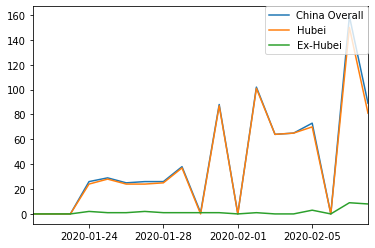

In [584]:
plotGraph(new_death_China,new_death_Hubei,new_death_ChinaExHubei)

In [601]:
new_confirmed_Hubei

2020-01-21     270.0
2020-01-22     174.0
2020-01-23       0.0
2020-01-24     105.0
2020-01-25     503.0
2020-01-26     371.0
2020-01-27    1291.0
2020-01-28     840.0
2020-01-29    1032.0
2020-01-30     317.0
2020-01-31    2250.0
2020-02-01       0.0
2020-02-02    4024.0
2020-02-03    2345.0
2020-02-04    3156.0
2020-02-05    2987.0
2020-02-06       0.0
2020-02-07    5288.0
2020-02-08    2147.0
dtype: float64

In [607]:
def movingAvg(original):
    new = original.copy()
    l = len(original)
    new[0] = (original[0]+original[1])/2
    for i in range(l-2):
        new[i] = (original[i]+original[i+1]+original[i+2])/3
    new[l-1] = (original[l-2]+original[l-1])/2
    return new

In [608]:
new_confirmed_avg = movingAvg(new_confirmed)
new_death_avg = movingAvg(new_death)

new_confirmed_China_avg = movingAvg(new_confirmed_China)
new_death_China_avg = movingAvg(new_death_China)

new_confirmed_Hubei_avg = movingAvg(new_confirmed_Hubei)
new_death_Hubei_avg = movingAvg(new_death_Hubei)

new_confirmed_ChinaExHubei_avg = movingAvg(new_confirmed_ChinaExHubei)
new_death_ChinaExHubei_avg = movingAvg(new_death_ChinaExHubei)

new_confirmed_ExChina_avg = movingAvg(new_confirmed_ExChina)
new_death_ExChina_avg = movingAvg(new_death_ExChina)


In [625]:
def calc_delayed_death_rate(confirmed, death, days_delayed):
    rate = confirmed.copy()
    l = len(confirmed)
    for i in range(days_delayed):
        rate[i] = 0
    for i in range(days_delayed,l):
        rate[i] = death[i] / confirmed[i-days_delayed]
    return rate

In [634]:
calc_delayed_death_rate(new_confirmed_Hubei_avg, new_death_Hubei_avg, 4)

2020-01-21    0.000000
2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.000000
2020-01-25    0.171171
2020-01-26    0.261649
2020-01-27    0.141447
2020-01-28    0.063330
2020-01-29    0.057275
2020-01-30    0.034772
2020-01-31    0.059437
2020-02-01    0.075377
2020-02-02    0.063907
2020-02-03    0.077522
2020-02-04    0.021517
2020-02-05    0.034542
2020-02-06    0.024252
2020-02-07    0.053016
2020-02-08    0.056406
dtype: float64

In [633]:
print(new_confirmed_Hubei_avg, new_death_Hubei_avg)

2020-01-21     148.000000
2020-01-22      93.000000
2020-01-23     202.666667
2020-01-24     326.333333
2020-01-25     721.666667
2020-01-26     834.000000
2020-01-27    1054.333333
2020-01-28     729.666667
2020-01-29    1199.666667
2020-01-30     855.666667
2020-01-31    2091.333333
2020-02-01    2123.000000
2020-02-02    3175.000000
2020-02-03    2829.333333
2020-02-04    2047.666667
2020-02-05    2758.333333
2020-02-06    2478.333333
2020-02-07    5288.000000
2020-02-08    3717.500000
dtype: float64 2020-01-21      0.000000
2020-01-22      8.000000
2020-01-23     17.333333
2020-01-24     25.333333
2020-01-25     25.333333
2020-01-26     24.333333
2020-01-27     28.666667
2020-01-28     20.666667
2020-01-29     41.333333
2020-01-30     29.000000
2020-01-31     62.666667
2020-02-01     55.000000
2020-02-02     76.666667
2020-02-03     66.333333
2020-02-04     45.000000
2020-02-05     73.333333
2020-02-06     77.000000
2020-02-07    150.000000
2020-02-08    115.500000
dtype: float64
